<a href="https://colab.research.google.com/github/ReginaFierro2000/Artificial-intelligence/blob/main/Centralidad_de_grado_y_eigenvector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn.cluster import SpectralClustering, KMeans
from sklearn import metrics
import pandas as pd
from sklearn.metrics import pairwise_distances
from matplotlib import pyplot as plt
import networkx as nx
import seaborn as sns
sns.set()


In [2]:
g = nx.Graph()
 
g.add_edge("Pitbull" ,"Fergie") #
g.add_edge("Pitbull" ,"Chris Brown") #
g.add_edge("Pitbull", "Jeancarlos") #
g.add_edge("Pitbull" ,"Marc Anthony") #
g.add_edge("Pitbull" , "Shakira") #
g.add_edge("Pitbull" , "Pharrell Williams") #
g.add_edge("Pitbull" , "Enrique Iglesias") #
g.add_edge("Pitbull" , "Ne-Yo") #
g.add_edge("Pitbull" , "Christina Aguilera") #

g.add_edge("Enrique Iglesias" , "Ricky Martin") #
g.add_edge("Enrique Iglesias" , " Sebastián Yatra ") #
g.add_edge("Enrique Iglesias" , "Andrea Bocelli") #
g.add_edge("Enrique Iglesias","Britney Spears") #
g.add_edge("Enrique Iglesias" , "Beyoncé") #
g.add_edge("Enrique Iglesias","Pink") #

g.add_edge("Thalía", "Maluma") #
g.add_edge("Thalía" , "Ricky Martin") #
g.add_edge("Thalía", "Marc Anthony") #
g.add_edge("Thalía", "Becky G") #
g.add_edge("Thalía","Gente de Zona") #
g.add_edge("Thalía","Reik") #

g.add_edge("Reik", "Ha*Ash") #
g.add_edge("Reik", "Sin Bandera") #
g.add_edge("Reik", "Maluma") #
g.add_edge("Reik", "Ozuna") #
g.add_edge("Reik","Wisin") #
g.add_edge("Reik", "Super Junior") #
g.add_edge("Reik", "Wisin & Yandel") #


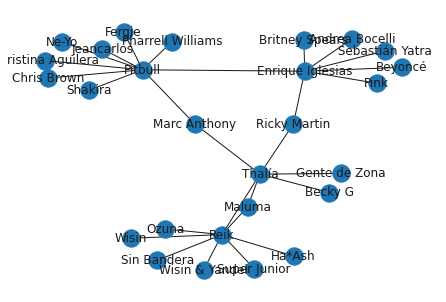

In [4]:
# drawing in spectral layout
nx.draw_spring(g, with_labels = True)
plt.savefig("Grafo.png")

In [5]:
from urllib.request import AbstractDigestAuthHandler
art = [1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,3,3,3,3,3,3,4,4,4,4,4,4,4]
col = [8,9,10,7,11,12,2,13,14,6,15,16,17,18,19,5,6,7,20,21,4,22,23,5,24,25,26,27]
numero = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28]

df_ = pd.DataFrame()
df_['numero'] = numero
df_['artista'] = art
df_['colaboradores'] = col

In [6]:
print(g)
adjM = nx.adjacency_matrix(g).todense()
#adjM

Graph with 27 nodes and 28 edges


##Usando la medida de centralidad de grado

In [7]:
# Calculate degree centrality for each node
degree_centrality = nx.degree_centrality(g)

# Print the degree centrality for each node
for node, centrality in degree_centrality.items():
    print(f"Node {node}: Degree centrality = {centrality}")

Node Pitbull: Degree centrality = 0.34615384615384615
Node Fergie: Degree centrality = 0.038461538461538464
Node Chris Brown: Degree centrality = 0.038461538461538464
Node Jeancarlos: Degree centrality = 0.038461538461538464
Node Marc Anthony: Degree centrality = 0.07692307692307693
Node Shakira: Degree centrality = 0.038461538461538464
Node Pharrell Williams: Degree centrality = 0.038461538461538464
Node Enrique Iglesias: Degree centrality = 0.2692307692307693
Node Ne-Yo: Degree centrality = 0.038461538461538464
Node Christina Aguilera: Degree centrality = 0.038461538461538464
Node Ricky Martin: Degree centrality = 0.07692307692307693
Node  Sebastián Yatra : Degree centrality = 0.038461538461538464
Node Andrea Bocelli: Degree centrality = 0.038461538461538464
Node Britney Spears: Degree centrality = 0.038461538461538464
Node Beyoncé: Degree centrality = 0.038461538461538464
Node Pink: Degree centrality = 0.038461538461538464
Node Thalía: Degree centrality = 0.23076923076923078
Node Ma

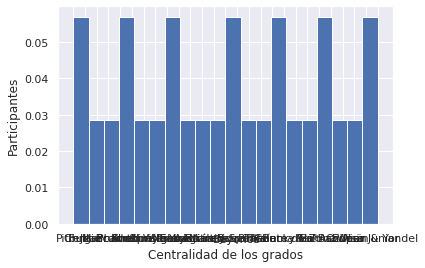

In [8]:
plt.hist(degree_centrality, bins=20, density=True)
#plt.hist(degree_centrality1, bins=12, density=True, cumulative=True, label='CDF', histtype='step')
plt.xlabel("Centralidad de los grados")
plt.ylabel("Participantes")
plt.show()

En el histograma se aprecia la distribución de la cetralidad de los grados y el número de participantes, entonces entre mayor es el número de participantes es la fama o la cantidad de colaboraciones que hizo un artista, por ejemplo, pitbul quién es el primer artista se nota que ha realizado muchas contribuciones con otros artistas y es de los más altos. 

In [9]:
# Define a list of floats
floats_list = [0.34615384615384615,0.038461538461538464,0.038461538461538464,0.038461538461538464,0.07692307692307693,
               0.038461538461538464,0.038461538461538464,0.2692307692307693,0.038461538461538464, 0.038461538461538464,
               0.07692307692307693, 0.038461538461538464,0.038461538461538464,0.038461538461538464, 0.23076923076923078,
               0.07692307692307693, 0.038461538461538464]

# Sort the list of floats
sorted_list = sorted(floats_list,reverse=True)

# Print the sorted list
print("Ordenados en orden descendente: ",sorted_list)

Ordenados en orden descendente:  [0.34615384615384615, 0.2692307692307693, 0.23076923076923078, 0.07692307692307693, 0.07692307692307693, 0.07692307692307693, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464]


##Nueva Base de Datos


In [10]:
import csv
from operator import itemgetter
import networkx as nx
from networkx.algorithms import community 

In [11]:
import pandas as pd

df3 = pd.read_csv('/content/quakers_edgelist_1.csv')
print(df3)

             Source                                         Target
0      George Keith                                 Robert Barclay
1      George Keith                                 Benjamin Furly
2      George Keith  Anne Conway Viscountess Conway and Killultagh
3      George Keith               Franciscus Mercurius van Helmont
4      George Keith                                   William Penn
..              ...                                            ...
96   Mary Penington                                  Thomas Curtis
97   Mary Penington                                 Thomas Ellwood
98    Thomas Curtis                                 Thomas Ellwood
99    Thomas Curtis                                William Simpson
100   Thomas Curtis                                     John Story

[101 rows x 2 columns]


In [12]:
df3.loc[df3['Source'] == 'George Keith', 'Source'] = '1'
df3.loc[df3['Source'] == 'James Parnel', 'Source'] = '2'
df3.loc[df3['Source'] == 'Peter Collinson', 'Source'] = '3'
df3.loc[df3['Source'] == 'Joseph Wyeth', 'Source'] = '4'
df3.loc[df3['Source'] == 'Alexander Skene of Newtyle', 'Source'] = '5'
df3.loc[df3['Source'] == 'William Dewsbury', 'Source'] = '6'
df3.loc[df3['Source'] == 'John Audland', 'Source'] = '7'
df3.loc[df3['Source'] == 'Francis Howgill', 'Source'] = '8'
df3.loc[df3['Source'] == 'William Bradford', 'Source'] = '9'
df3.loc[df3['Source'] == 'George Fox', 'Source'] = '10'
df3.loc[df3['Source'] == 'John Stubbs', 'Source'] = '11'
df3.loc[df3['Source'] == 'John Wilkinson', 'Source'] = '12'
df3.loc[df3['Source'] == 'James Nayler', 'Source'] = '13'
df3.loc[df3['Source'] == 'Anthony Sharp', 'Source'] = '14'
df3.loc[df3['Source'] == 'Benjamin Furly', 'Source'] = '15'
df3.loc[df3['Source'] == 'George Whitehead', 'Source'] = '16'
df3.loc[df3['Source'] == 'Edward Burrough', 'Source'] = '17'
df3.loc[df3['Source'] == 'Richard Farnworth', 'Source'] = '18'
df3.loc[df3['Source'] == 'William Penn', 'Source'] = '19'
df3.loc[df3['Source'] == 'Margaret Fell', 'Source'] = '20'
df3.loc[df3['Source'] == 'Mary Penington', 'Source'] = '21'
df3.loc[df3['Source'] == 'Thomas Curtis', 'Source'] = '22'

df3.loc[df3['Target'] == 'TRobert Barclay', 'Target'] = '23'
df3.loc[df3['Target'] == 'Benjamin Furly', 'Target'] = '24'
df3.loc[df3['Target'] == 'Anne Conway Viscountess Conway and Killultagh', 'Target'] = '25'
df3.loc[df3['Target'] == 'Franciscus Mercurius van Helmont', 'Target'] = '26'
df3.loc[df3['Target'] == 'William Penn', 'Target'] = '27'
df3.loc[df3['Target'] == 'George Fox', 'Target'] = '28'
df3.loc[df3['Target'] == 'George Whitehead', 'Target'] = '29'
df3.loc[df3['Target'] == 'William Bradford', 'Target'] = '30'
df3.loc[df3['Target'] == 'Benjamin Furly', 'Target'] = '31'
df3.loc[df3['Target'] == 'Stephen Crisp', 'Target'] = '32'
df3.loc[df3['Target'] == 'John Bartram', 'Target'] = '33'
df3.loc[df3['Target'] == 'James Logan', 'Target'] = '34'
df3.loc[df3['Target'] == 'Lilias Skene', 'Target'] = '35'
df3.loc[df3['Target'] == 'Edward Burrough', 'Target'] = '36'
df3.loc[df3['Target'] == 'John Crook', 'Target'] = '37'
df3.loc[df3['Target'] == 'John Camm', 'Target'] = '38'
df3.loc[df3['Target'] == 'Francis Howgill', 'Target'] = '39'
df3.loc[df3['Target'] == 'Edward Pyott', 'Target'] = '39'
df3.loc[df3['Target'] == 'Charles Marshall', 'Target'] = '40'
df3.loc[df3['Target'] == 'Anne Camm', 'Target'] = '41'
df3.loc[df3['Target'] == 'Martha Simmonds', 'Target'] = '42'
df3.loc[df3['Target'] == 'James Nayler', 'Target'] = '43'
df3.loc[df3['Target'] == 'Edward Burrough', 'Target'] = '44'
df3.loc[df3['Target'] == 'Richard Farnworth', 'Target'] = '45'
df3.loc[df3['Target'] == 'William Crouch', 'Target'] = '46'
df3.loc[df3['Target'] == 'Tace Sowle', 'Target'] = '47'
df3.loc[df3['Target'] == 'Ellis Hookes', 'Target'] = '48'
df3.loc[df3['Target'] == 'William Mead', 'Target'] = '49'
df3.loc[df3['Target'] == 'Elizabeth Hooten', 'Target'] = '50'
df3.loc[df3['Target'] == 'Margaret Fell', 'Target'] = '51'
df3.loc[df3['Target'] == 'John Crook', 'Target'] = '52'
df3.loc[df3['Target'] == 'George Whitehead', 'Target'] = '53'
df3.loc[df3['Target'] == 'Benjamin Furly', 'Target'] = '54'
df3.loc[df3['Target'] == 'Thomas Salthouse', 'Target'] = '55'
df3.loc[df3['Target'] == 'John Wilkinson', 'Target'] = '56'
df3.loc[df3['Target'] == 'Thomas Ellwood', 'Target'] = '57'
df3.loc[df3['Target'] == 'William Coddington', 'Target'] = '58'
df3.loc[df3['Target'] == 'John Stubbs', 'Target'] = '59'
df3.loc[df3['Target'] == 'John Perrot', 'Target'] = '60'
df3.loc[df3['Target'] == 'Leonard Fell', 'Target'] = '61'
df3.loc[df3['Target'] == 'William Caton', 'Target'] = '62'
df3.loc[df3['Target'] == 'Samuel Fisher', 'Target'] = '63'
df3.loc[df3['Target'] == 'John Burnyeat', 'Target'] = '64'
df3.loc[df3['Target'] == 'Solomon Eccles', 'Target'] = '65'
df3.loc[df3['Target'] == 'John Story', 'Target'] = '66'
df3.loc[df3['Target'] == 'Alexander Parker', 'Target'] = '67'
df3.loc[df3['Target'] == 'Hannah Stranger', 'Target'] = '68'
df3.loc[df3['Target'] == 'Gervase Benson', 'Target'] = '69'
df3.loc[df3['Target'] == 'Margaret Fell', 'Target'] = '70'
df3.loc[df3['Target'] == 'Robert Rich', 'Target'] = '71'
df3.loc[df3['Target'] == 'Anthony Pearson', 'Target'] = '72'
df3.loc[df3['Target'] == 'Rebecca Travers', 'Target'] = '73'
df3.loc[df3['Target'] == 'William Tomlinson', 'Target'] = '74'
df3.loc[df3['Target'] == 'Samuel Clarridge', 'Target'] = '75'
df3.loc[df3['Target'] == 'Thomas Curtis', 'Target'] = '76'
df3.loc[df3['Target'] == 'William Edmundson', 'Target'] = '77'
df3.loc[df3['Target'] == 'Robert Barclay', 'Target'] = '78'
df3.loc[df3['Target'] == 'John Whitehead', 'Target'] = '79'
df3.loc[df3['Target'] == 'Daniel Quare', 'Target'] = '80'
df3.loc[df3['Target'] == 'James Claypoole', 'Target'] = '81'
df3.loc[df3['Target'] == 'Thomas Story', 'Target'] = '82'
df3.loc[df3['Target'] == 'Mary Penington', 'Target'] = '83'
df3.loc[df3['Target'] == 'David Lloyd', 'Target'] = '84'
df3.loc[df3['Target'] == 'Richard Claridge', 'Target'] = '85'
df3.loc[df3['Target'] == 'Elizabeth Leavens', 'Target'] = '86'
df3.loc[df3['Target'] == 'William Simpson', 'Target'] = '87'
df3.loc[df3['Target'] == 'Thomas Ellwood', 'Target'] = '88'

In [13]:
g2 = nx.Graph()
 
g2.add_edge("George Keith" ,"Robert Barclay")
g2.add_edge("George Keith" ,"Benjamin Furly") 
g2.add_edge("George Keith" ,"Anne Conway Viscountess Conway and Killultagh")
g2.add_edge("George Keith" ,"Franciscus Mercurius van Helmont")
g2.add_edge("George Keith" ,"William Penn")
g2.add_edge("George Keith" ,"George Fox")
g2.add_edge("George Keith" ,"George Whitehead")
g2.add_edge("George Keith" ,"William Bradford")
g2.add_edge("James Parnel" ,"Benjamin Furly")
g2.add_edge("James Parnel" ,"Stephen Crisp")
g2.add_edge("Peter Collinson" ,"John Bartram")
g2.add_edge("Peter Collinson" ,"James Logan")
g2.add_edge("Joseph Wyeth" ,"Thomas Ellwood")
g2.add_edge("Alexander Skene of Newtyle" ,"Lilias Skene")
g2.add_edge("William Dewsbury" ,"Edward Burrough")
g2.add_edge("William Dewsbury" ,"George Fox")
g2.add_edge("William Dewsbury" ,"John Crook")
g2.add_edge("John Audland" ,"John Camm")
g2.add_edge("John Audland" ,"Francis Howgill")
g2.add_edge("John Audland" ,"Edward Pyott")
g2.add_edge("John Audland" ,"Charles Marshall")
g2.add_edge("John Audland" ,"George Fox")
g2.add_edge("John Audland" ,"Anne Camm")
g2.add_edge("Francis Howgill" ,"Martha Simmonds")
g2.add_edge("Francis Howgill" ,"James Nayler")
g2.add_edge("Francis Howgill" ,"Edward Burrough")
g2.add_edge("Francis Howgill" ,"George Fox")
g2.add_edge("Francis Howgill" ,"Richard Farnworth")
g2.add_edge("Francis Howgill" ,"William Crouch")
g2.add_edge("William Bradford" ,"William Penn")
g2.add_edge("William Bradford" ,"Tace Sowle")
g2.add_edge("George Fox" ,"Ellis Hookes")
g2.add_edge("George Fox" ,"William Mead")
g2.add_edge("George Fox" ,"Elizabeth Hooten")
g2.add_edge("George Fox" ,"Margaret Fell")
g2.add_edge("George Fox" ,"John Crook")
g2.add_edge("George Fox" ,"George Whitehead")
g2.add_edge("George Fox" ,"Benjamin Furly")
g2.add_edge("George Fox" ,"Thomas Salthouse")
g2.add_edge("George Fox" ,"James Nayler")
g2.add_edge("George Fox" ,"Edward Burrough")
g2.add_edge("George Fox" ,"John Wilkinson")
g2.add_edge("George Fox" ,"Thomas Ellwood")
g2.add_edge("George Fox" ,"William Coddington")
g2.add_edge("George Fox" ,"John Stubbs")
g2.add_edge("George Fox" ,"John Perrot")
g2.add_edge("George Fox" ,"Leonard Fell")
g2.add_edge("George Fox" ,"William Penn")
g2.add_edge("John Stubbs" ,"Benjamin Furly")
g2.add_edge("John Stubbs" ,"William Caton")
g2.add_edge("John Stubbs" ,"Samuel Fisher")
g2.add_edge("John Stubbs" ,"John Burnyeat")
g2.add_edge("John Wilkinson" ,"Solomon Eccles")
g2.add_edge("John Wilkinson" ,"John Story")
g2.add_edge("John Wilkinson" ,"Alexander Parker")
g2.add_edge("James Nayler" ,"Hannah Stranger")
g2.add_edge("James Nayler" ,"Gervase Benson")
g2.add_edge("James Nayler" ,"Margaret Fell")
g2.add_edge("James Nayler" ,"Richard Farnworth")
g2.add_edge("James Nayler" ,"George Whitehead")
g2.add_edge("James Nayler" ,"John Perrot")
g2.add_edge("James Nayler" ,"Robert Rich")
g2.add_edge("James Nayler" ,"Anthony Pearson")
g2.add_edge("James Nayler" ,"Thomas Ellwood")
g2.add_edge("James Nayler" ,"Edward Burrough")
g2.add_edge("James Nayler" ,"Rebecca Travers")
g2.add_edge("James Nayler" ,"William Tomlinson")
g2.add_edge("Anthony Sharp" ,"Samuel Clarridge")
g2.add_edge("Anthony Sharp" ,"Thomas Curtis")
g2.add_edge("Anthony Sharp" ,"William Edmundson")
g2.add_edge("Benjamin Furly" ,"Robert Barclay")
g2.add_edge("Benjamin Furly" ,"Alexander Parker")
g2.add_edge("Benjamin Furly" ,"William Caton")
g2.add_edge("Benjamin Furly" ,"William Penn")
g2.add_edge("George Whitehead" ,"Alexander Parker")
g2.add_edge("George Whitehead" ,"John Whitehead")
g2.add_edge("George Whitehead" ,"Daniel Quare")
g2.add_edge("George Whitehead" ,"William Penn")
g2.add_edge("George Whitehead" ,"John Story")
g2.add_edge("George Whitehead" ,"Rebecca Travers")
g2.add_edge("Edward Burrough" ,"John Perrot")
g2.add_edge("Edward Burrough" ,"Thomas Ellwood")
g2.add_edge("Edward Burrough" ,"William Crouch")
g2.add_edge("Richard Farnworth" ,"John Perrot")
g2.add_edge("Richard Farnworth" ,"Margaret Fell")
g2.add_edge("Richard Farnworth" ,"Anthony Pearson")
g2.add_edge("William Penn" ,"Tace Sowle")
g2.add_edge("William Penn" ,"James Claypoole")
g2.add_edge("William Penn" ,"Thomas Story")
g2.add_edge("William Penn" ,"Mary Penington")
g2.add_edge("William Penn" ,"David Lloyd")
g2.add_edge("William Penn" ,"Margaret Fell")
g2.add_edge("William Penn" ,"Richard Claridge")
g2.add_edge("Margaret Fell" ,"Alexander Parker")
g2.add_edge("Margaret Fell" ,"Elizabeth Leavens")
g2.add_edge("Margaret Fell" ,"Anthony Pearson")
g2.add_edge("Mary Penington" ,"Thomas Curtis")
g2.add_edge("Mary Penington" ,"Thomas Ellwood")
g2.add_edge("Thomas Curtis" ,"Thomas Ellwood")
g2.add_edge("Thomas Curtis" ,"John Story")
g2.add_edge("Thomas Curtis" ,"William Simpson")


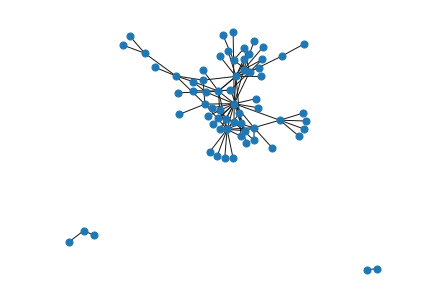

In [15]:
import networkx as nx
import matplotlib.pyplot as plt

nx.draw_spring(g2, node_size = 50, width = 1,with_labels = False)
plt.axis("equal")
plt.show()

In [16]:
print(g2)
adjM = nx.adjacency_matrix(g2).todense()

Graph with 67 nodes and 101 edges


In [17]:
# Calculate degree centrality for each node
degree_centrality1 = nx.degree_centrality(g2)

# Print the degree centrality for each node
for node, centrality in degree_centrality1.items():
    print(f"Node {node}: Degree centrality = {centrality}")

Node George Keith: Degree centrality = 0.12121212121212122
Node Robert Barclay: Degree centrality = 0.030303030303030304
Node Benjamin Furly: Degree centrality = 0.12121212121212122
Node Anne Conway Viscountess Conway and Killultagh: Degree centrality = 0.015151515151515152
Node Franciscus Mercurius van Helmont: Degree centrality = 0.015151515151515152
Node William Penn: Degree centrality = 0.18181818181818182
Node George Fox: Degree centrality = 0.3181818181818182
Node George Whitehead: Degree centrality = 0.13636363636363635
Node William Bradford: Degree centrality = 0.045454545454545456
Node James Parnel: Degree centrality = 0.030303030303030304
Node Stephen Crisp: Degree centrality = 0.015151515151515152
Node Peter Collinson: Degree centrality = 0.030303030303030304
Node John Bartram: Degree centrality = 0.015151515151515152
Node James Logan: Degree centrality = 0.015151515151515152
Node Joseph Wyeth: Degree centrality = 0.015151515151515152
Node Thomas Ellwood: Degree centrality =

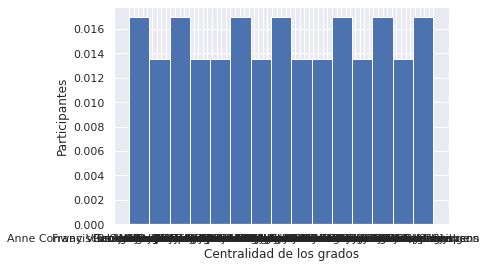

In [18]:
plt.hist(degree_centrality1, bins=15, density=True)
#plt.hist(degree_centrality1, bins=12, density=True, cumulative=True, label='CDF', histtype='step')
plt.xlabel("Centralidad de los grados")
plt.ylabel("Participantes")
plt.show()

En el histograma se implementó la centralidad de los grados con los cuáqueros, entre mayor era la comunicación que se mostraban entre ellos crecía más la reputación del movimiento, por ejemplo, George Fox es el más alto en los datos de centralidad de los grados entonces él tenía mayor fama por el movimiento.

In [19]:
# Define a list of floats
floats_list2 = [0.12121212121212122, 0.030303030303030304,0.015151515151515152, 0.18181818181818182,0.3181818181818182, 
                0.13636363636363635,0.045454545454545456, 0.09090909090909091, 0.10606060606060606, 0.21212121212121213,
                0.07575757575757576,0.045454545454545456]

# Sort the list of floats
sorted_list = sorted(floats_list2,reverse=True)

# Print the sorted list
print(sorted_list)

[0.3181818181818182, 0.21212121212121213, 0.18181818181818182, 0.13636363636363635, 0.12121212121212122, 0.10606060606060606, 0.09090909090909091, 0.07575757575757576, 0.045454545454545456, 0.045454545454545456, 0.030303030303030304, 0.015151515151515152]


##Usando la medida de centralidad de eigenvector

Primero usando el grafo de los artistas

In [20]:
print(g)
#adjM = nx.adjacency_matrix(g)
adjM = nx.adjacency_matrix(g).todense()
adjM

Graph with 27 nodes and 28 edges


array([[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 

In [21]:
W = pairwise_distances(adjM, metric="euclidean")
vectorizer = np.vectorize(lambda x: 1 if x < 5 else 0)
W = np.vectorize(vectorizer)(W)
print(W)

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

In [22]:
# degree matrix
D = np.diag(np.sum(np.array(W), axis=1))
print('degree matrix:')
print(D)# laplacian matrix
L = D - W
print('laplacian matrix:')
print(L)

degree matrix:
[[27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 27  

In [24]:
e, v = np.linalg.eig(L)
print('eigenvalues:') # eigenvalues
e.sort(axis=0) # ordenar los datos
print(e) 
print('eigenvectors:') # eigenvectors
v.sort(axis=0)
print(v)

eigenvalues:
[-6.83720066e-16+0.00000000e+00j  2.70000000e+01+0.00000000e+00j
  2.70000000e+01+0.00000000e+00j  2.70000000e+01+0.00000000e+00j
  2.70000000e+01+0.00000000e+00j  2.70000000e+01+0.00000000e+00j
  2.70000000e+01+0.00000000e+00j  2.70000000e+01-1.06133319e-15j
  2.70000000e+01+0.00000000e+00j  2.70000000e+01+0.00000000e+00j
  2.70000000e+01+0.00000000e+00j  2.70000000e+01+1.06133319e-15j
  2.70000000e+01+0.00000000e+00j  2.70000000e+01+0.00000000e+00j
  2.70000000e+01+0.00000000e+00j  2.70000000e+01+0.00000000e+00j
  2.70000000e+01+0.00000000e+00j  2.70000000e+01+0.00000000e+00j
  2.70000000e+01+0.00000000e+00j  2.70000000e+01+0.00000000e+00j
  2.70000000e+01+0.00000000e+00j  2.70000000e+01+0.00000000e+00j
  2.70000000e+01+0.00000000e+00j  2.70000000e+01+0.00000000e+00j
  2.70000000e+01+0.00000000e+00j  2.70000000e+01+0.00000000e+00j
  2.70000000e+01+0.00000000e+00j]
eigenvectors:
[[-1.92450090e-01+0.j         -1.07240457e-01+0.j
  -3.77425678e-02+0.j         -2.72053595e-0

##Segunda base de datos

In [25]:
print(g2)
#adjM = nx.adjacency_matrix(g)
adjM = nx.adjacency_matrix(g2).todense()
adjM

Graph with 67 nodes and 101 edges


array([[0, 1, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [27]:
W2 = pairwise_distances(adjM, metric="euclidean")
vectorizer = np.vectorize(lambda x: 1 if x < 5 else 0)
W2 = np.vectorize(vectorizer)(W2)
print(W2)

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


In [29]:
# degree matrix
D = np.diag(np.sum(np.array(W), axis=1))
print('degree matrix:')
print(D)# laplacian matrix
L2 = D - W2
print('laplacian matrix:')
print(L2)

degree matrix:
[[67  0  0 ...  0  0  0]
 [ 0 67  0 ...  0  0  0]
 [ 0  0 67 ...  0  0  0]
 ...
 [ 0  0  0 ... 67  0  0]
 [ 0  0  0 ...  0 67  0]
 [ 0  0  0 ...  0  0 67]]
laplacian matrix:
[[66 -1 -1 ... -1 -1 -1]
 [-1 66 -1 ... -1 -1 -1]
 [-1 -1 66 ... -1 -1 -1]
 ...
 [-1 -1 -1 ... 66 -1 -1]
 [-1 -1 -1 ... -1 66 -1]
 [-1 -1 -1 ... -1 -1 66]]


In [30]:
e, v = np.linalg.eig(L2)
print('eigenvalues:') # eigenvalues
e.sort(axis=0) # ordenar los datos
print(e) 
print('eigenvectors:') # eigenvectors
v.sort(axis=0)
print(v)

eigenvalues:
[-8.54871729e-15  6.30000000e+01  6.60000000e+01  6.60000000e+01
  6.70000000e+01  6.70000000e+01  6.70000000e+01  6.70000000e+01
  6.70000000e+01  6.70000000e+01  6.70000000e+01  6.70000000e+01
  6.70000000e+01  6.70000000e+01  6.70000000e+01  6.70000000e+01
  6.70000000e+01  6.70000000e+01  6.70000000e+01  6.70000000e+01
  6.70000000e+01  6.70000000e+01  6.70000000e+01  6.70000000e+01
  6.70000000e+01  6.70000000e+01  6.70000000e+01  6.70000000e+01
  6.70000000e+01  6.70000000e+01  6.70000000e+01  6.70000000e+01
  6.70000000e+01  6.70000000e+01  6.70000000e+01  6.70000000e+01
  6.70000000e+01  6.70000000e+01  6.70000000e+01  6.70000000e+01
  6.70000000e+01  6.70000000e+01  6.70000000e+01  6.70000000e+01
  6.70000000e+01  6.70000000e+01  6.70000000e+01  6.70000000e+01
  6.70000000e+01  6.70000000e+01  6.70000000e+01  6.70000000e+01
  6.70000000e+01  6.70000000e+01  6.70000000e+01  6.70000000e+01
  6.70000000e+01  6.70000000e+01  6.70000000e+01  6.70000000e+01
  6.70000000

**Análisis de Datos:**

¿Qué datos son? 
Amabas bases de datos tienen datos enteros.
La primero Base de datos habla sobre artistas que han colaborado entre si y la segunda base de datos es sobre los cuáqueros y la comunicación que tuvieron entre ellos. 

¿cuántos son? 
Primera base de datos: 32 artistas
Segunda base de datos: 109 cuáqueros

¿cuántas aristas tienen? 
Primera base de datos: Tiene 27 nodos y 28 aristas
Segunda base de datos: Tiene 67 nodos y 101 aristas

¿qué se puede decir de los vértices de mayor centralidad?  

Primera base de datos: El que tuvo mayor centralidad fue Pitbull con 0.34615384615384615, esto quiere decir que tuvo mayor colaboración con más artistas que los demás.

Segunda base de datos: George Fox fue el que obtuvo mayor centralidad, tuvo de 0.3181818181818182 ya que el fue el fundador de la Sociedad Religiosa de los Amigos, entonces la mayoria de los miembros se comunicaban más con él quien era el representante y el lider del movimiento. 
